<a href="https://colab.research.google.com/github/Tdas-christ/Machine_Learning/blob/main/ML_COMPONENT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
data = pd.read_csv('/content/drive/MyDrive/DATASETS/2015.csv')

In [199]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [200]:
column_datatypes = data.dtypes
print(column_datatypes)

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object


In [201]:
data.count()

Country                          158
Region                           158
Happiness Rank                   158
Happiness Score                  158
Standard Error                   158
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         158
Freedom                          158
Trust (Government Corruption)    158
Generosity                       158
Dystopia Residual                158
dtype: int64

**HANDLING MISSING VALUES**

In [202]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There are no missing values.

**CREATING BINS FOR HAPPINESS SCORE**

In [203]:
bin_edges = [1,3,6,9]
bin_labels = ['Low Happiness','Medium Happiness','High Happiness']

data['Happiness Score Group'] = pd.cut(data['Happiness Score'], bins = bin_edges, labels = bin_labels, right = False)

In [204]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score Group
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,High Happiness
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,High Happiness
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,High Happiness
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,High Happiness
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,High Happiness


**ONE-HOT ENCODING**

In [205]:
data_to_encode = data['Region']
encoded_data = pd.get_dummies(data_to_encode)

In [206]:
encoded_data

,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
153,0,0,0,0,0,0,0,0,1,0
154,0,0,0,0,0,0,0,0,1,0
155,0,0,0,0,1,0,0,0,0,0
156,0,0,0,0,0,0,0,0,1,0


**NORMALIZATION**

In [207]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in data[['Country', 'Region']]:
  data[col] = le.fit_transform(data[col])

In [208]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score Group
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,High Happiness
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,High Happiness
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,High Happiness
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,High Happiness
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,High Happiness


In [209]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
data1= data.drop(columns = 'Happiness Score Group', axis=1)
scaled_data = scaler.fit_transform(data1)

In [210]:
scaled_data

array([[ 1.23877001,  1.30025593, -1.72099989, ...,  2.30965159,
         0.47103971,  0.75825809],
       [-0.44946522,  1.30025593, -1.69907456, ..., -0.01647953,
         1.57585637,  1.09285682],
       [-0.90989302,  1.30025593, -1.67714922, ...,  2.8427738 ,
         0.8242928 ,  0.71233526],
       ...,
       [ 1.26069514, -0.37544095,  1.67742676, ...,  0.38141902,
         1.85689094, -3.20843049],
       [-1.26069514,  0.96511655,  1.69935209, ..., -0.35771452,
        -0.31694987, -0.48198451],
       [ 1.37032081,  0.96511655,  1.72127743, ..., -0.30180313,
        -0.5581534 , -0.96361241]])

**CHI-SQUARE TEST FOR INDEPENDENCE**

In [211]:
from sklearn.feature_selection import chi2
X = data.drop(columns = ['Happiness Rank', 'Happiness Score Group'], axis=1)
Y = data['Happiness Rank']

In [212]:
chi_scores = chi2(X,Y)

In [213]:
chi_scores

(array([4.18301911e+03, 2.73856613e+02, 3.82895735e+01, 9.63383602e-01,
        3.01498120e+01, 1.17411594e+01, 1.52064857e+01, 8.25943039e+00,
        1.57722432e+01, 1.06129718e+01, 2.29079625e+01]),
 array([0.00000000e+00, 1.70258781e-08, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]))

<Axes: >

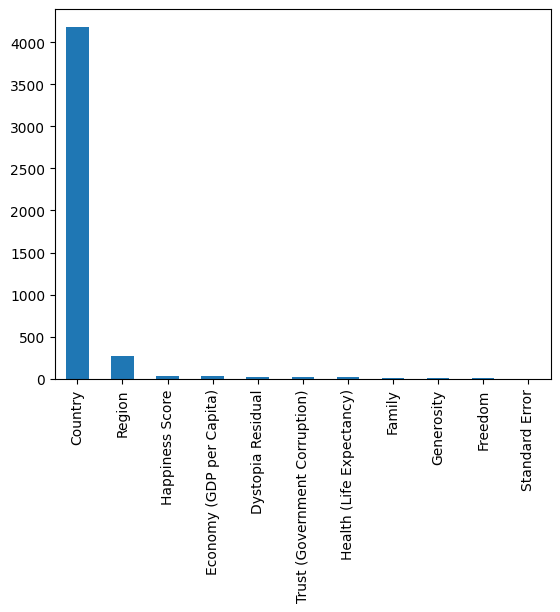

In [214]:
p_values=pd.Series(chi_scores[0],index=X.columns)
p_values.sort_values(ascending=False,inplace=True)
p_values.plot.bar()

In [215]:
from scipy.stats import chi2_contingency
statistic, p_value, dof, expected_freqp_value = chi2_contingency(chi_scores)

In [216]:
print(statistic)
print(p_value)
print(dof)
print(expected_freqp_value)

506.644363611684
1.6785740953049122e-102
10
[[4.17486998e+03 2.73323101e+02 3.92130317e+01 1.95955865e+00
  3.10891276e+01 1.27163377e+01 1.61749131e+01 9.24139168e+00
  1.67395685e+01 1.15903480e+01 2.38613864e+01]
 [8.14912881e+00 5.33512460e-01 7.65417960e-02 3.82495644e-03
  6.06843583e-02 2.48216291e-02 3.15725881e-02 1.80387153e-02
  3.26747660e-02 2.26237558e-02 4.65761837e-02]]


In [217]:
alpha = 0.05
if p_value<=alpha:
  print("Null Hypothesis is rejected; there is a significant relationship between Happiness Rank and Country, Region.")
else:
  print("Null Hypothesis is failed to be rejected; there is no significant relationship between Happiness Rank and Country, Region.")

Null Hypothesis is rejected; there is a significant relationship between Happiness Rank and Country, Region.


**COVARIANCE MATRIX**

In [218]:
numeric_data = data[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]

In [219]:
covariance_matrix = numeric_data.cov()

In [220]:
covariance_matrix

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Economy (GDP per Capita),0.162506,0.070852,0.081323,0.022495,0.014898,-0.000534,0.008939
Family,0.070852,0.074185,0.035741,0.018122,0.006722,0.003020,0.022332
Health (Life Expectancy),0.081323,0.035741,0.061047,0.013422,0.007365,0.003391,0.002596
Freedom,0.022495,0.018122,0.013422,0.022708,0.008927,0.007138,0.005237
Trust (Government Corruption),0.014898,0.006722,0.007365,0.008927,0.014408,0.004199,-0.002200
Generosity,-0.000534,0.003020,0.003391,0.007138,0.004199,0.016049,-0.007104
Dystopia Residual,0.008939,0.022332,0.002596,0.005237,-0.002200,-0.007104,0.306417


<Axes: >

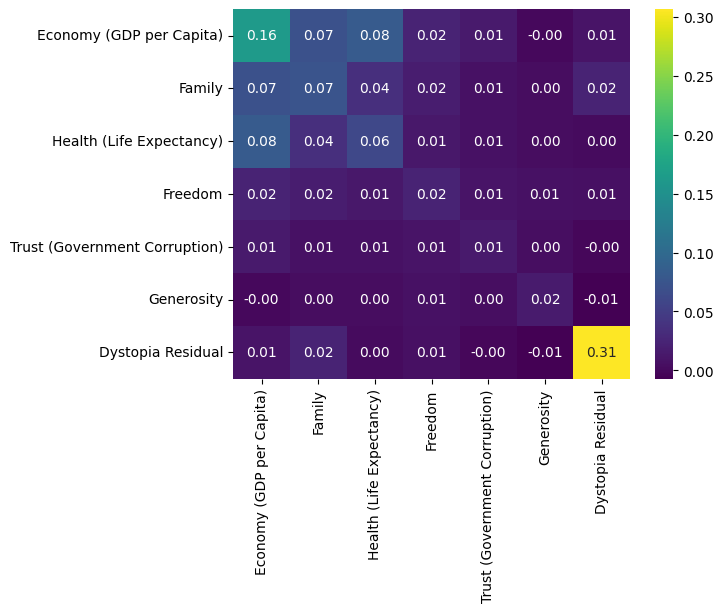

In [221]:
sns.heatmap(covariance_matrix, annot = True, fmt= '.2f', cmap='viridis')

**DATA VISUALIZATION**

In [222]:
country_count = data[['Happiness Score Group']].value_counts().sort_index()

In [223]:
country_count

Happiness Score Group
Low Happiness              2
Medium Happiness         112
High Happiness            44
dtype: int64

TypeError: ignored

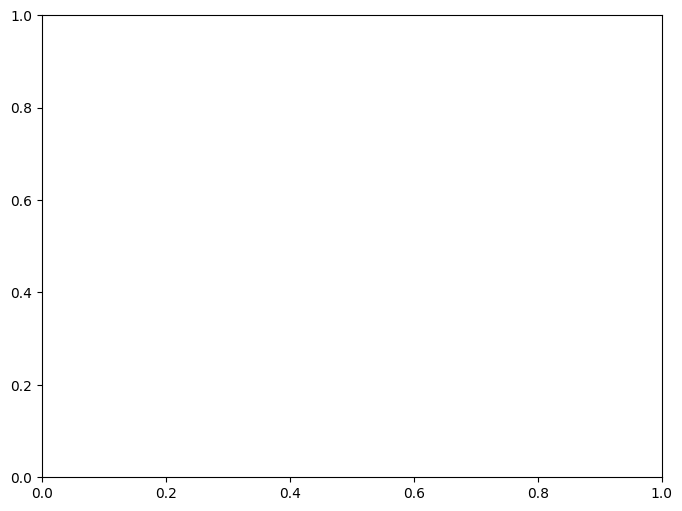

In [224]:
plt.figure(figsize = (8,6))
plt.bar(country_count.index, country_count.values, color='purple')
plt.title('Distribution of the Various Countries across each Happiness Score')
plt.show()

In [177]:
plt.hist(scaled_data['Health (Life Expectancy)'])
plt.show()

IndexError: ignored

In [ ]:
import plotly.graph_objects as go

fig2 = go.Figure()
fig2.add_trace(go.Histogram(x=scaled_data['Health (Life Expectancy)'], opacity=0.7, nbinsx=200))

fig2.update_layout(
    title='Distribution of Health (Life Expectancy)',
    xaxis_title='Change',
    yaxis_title='Frequency',
    barmode='overlay'
)
fig2.show()